## Long Short-Term Memory Networks

LSTM is a tweaked version of RNN, which can selectively forget or remember information(longer period of time).
When LSTM needs to add information, it makes small modifications rather than transforming the whole information unlike RNN.
In LSTM, information flows through a mechanism called cell states.

 The stock price of today will depend upon:

1. The trend that the stock has been following in the previous days, maybe a downtrend or an uptrend.
2. The price of the stock on the previous day, because many traders compare the stock’s previous day price before buying it.
3. The factors that can affect the price of the stock for today.

Generalizing the above factors in LSTM terms, 
1. The previous cell state (i.e. the information that was present in the memory after the previous time step).
2. The previous hidden state (i.e. this is the same as the output of the previous cell).
3. The input at the current time step (i.e. the new information that is being fed in at that moment).


A typical LSTM network is comprised of different memory blocks called cells.  There are two states that are being transferred to the next cell.
- the cell state
- the hidden state. 

The memory blocks are responsible for remembering things and manipulations to this memory is done through three major mechanisms, called gates.There are 3 gates:

#### 1) Forget gate
       A forget gate is responsible for removing information from the cell state. The information that is no longer required for the LSTM to understand things or the information that is of less importance is removed.
       
#### 2) Input gate
     The input gate is responsible for the addition of information to the cell state.
     
#### 3) Output gate
      The job of selecting useful information from the current cell state and showing it out as an output is done via the output gate. 

In [21]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [23]:
# Check the first 5 records
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [24]:
# Check the last 5 records
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [25]:
# Pick up the Open Column
training_set = dataset_train.iloc[:, 1:2].values

In [26]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [27]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [28]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [29]:
X_train = []
y_train = []

In [30]:
# Creating a data structure with 100 timesteps and 1 output. 1258 is the total number of records in the Open column
for i in range(100, 1258):
    X_train.append(training_set_scaled[i-100:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [31]:
X_train.shape

(1158, 100)

In [32]:
y_train.shape

(1158,)

In [33]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [34]:
X_train.shape

(1158, 100, 1)

## Building the RNN

In [38]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [39]:
# Initialising the RNN
regressor = Sequential()

In [40]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [41]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [42]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [43]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [44]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [45]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [46]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [47]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1158/1158 [==============================] - 7s 6ms/step - loss: 0.0449
Epoch 2/100
1158/1158 [==============================] - 7s 6ms/step - loss: 0.0059
Epoch 3/100
1158/1158 [==============================] - 8s 7ms/step - loss: 0.0062
Epoch 4/100
1158/1158 [==============================] - 7s 6ms/step - loss: 0.0056
Epoch 5/100
1158/1158 [==============================] - 8s 7ms/step - loss: 0.0048
Epoch 6/100
1158/1158 [==============================] - 8s 7ms/step - loss: 0.0051
Epoch 7/100
1158/1158 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 8/100
1158/1158 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 9/100
1158/1158 [==============================] - 8s 7ms/step - loss: 0.0056
Epoch 10/100
1158/1158 [==============================] - 8s 7ms/step - loss: 0.0044
Epoch 11/100
1158/1158 [==============================] - 8s 7ms/step - loss: 0.0040
Epoch 12/100
1158/1158 [==============================] - 7s 6ms/step - lo

In [48]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [49]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2017,778.81,789.63,775.80,786.14,"16,57,300"
1,01-04-2017,788.36,791.34,783.16,786.90,"10,73,000"
2,01-05-2017,786.08,794.48,785.02,794.02,"13,35,200"
3,01-06-2017,795.26,807.90,792.20,806.15,"16,40,200"
4,01-09-2017,806.40,809.97,802.83,806.65,"12,72,400"


In [50]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [51]:

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 100:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [52]:
inputs.shape

(142, 1)

In [53]:
for i in range(100, 142):
    X_test.append(inputs[i-100:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [54]:
predicted_stock_price

array([[777.08527],
       [774.30835],
       [774.32635],
       [775.3604 ],
       [778.21796],
       [783.5286 ],
       [788.4564 ],
       [790.5131 ],
       [790.9733 ],
       [790.95734],
       [790.9094 ],
       [790.776  ],
       [790.667  ],
       [791.2128 ],
       [792.1576 ],
       [796.5725 ],
       [803.1137 ],
       [810.1048 ],
       [813.9523 ],
       [810.24316],
       [800.5919 ],
       [794.34406],
       [792.3648 ],
       [792.8014 ],
       [794.3054 ],
       [795.6602 ],
       [799.797  ],
       [805.62897],
       [811.79755],
       [814.93506],
       [810.7257 ],
       [800.7711 ],
       [794.362  ],
       [792.3363 ],
       [792.80914],
       [794.3971 ],
       [795.85565],
       [800.09393],
       [806.016  ],
       [812.2577 ],
       [815.45154],
       [811.2849 ]], dtype=float32)

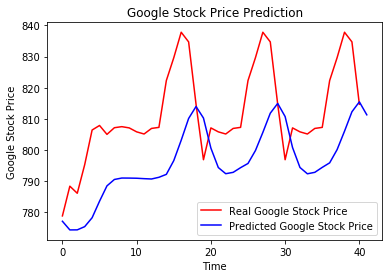

In [55]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [57]:
import math
from sklearn.metrics import mean_squared_error
# rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))